ex1

In [187]:
import sklearn
from sklearn . datasets import load_digits
import numpy as np

In [188]:
digits = load_digits ()

In [189]:
print ( digits . keys ())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [190]:
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]

In [191]:
print(images.shape)

(1797, 8, 8)


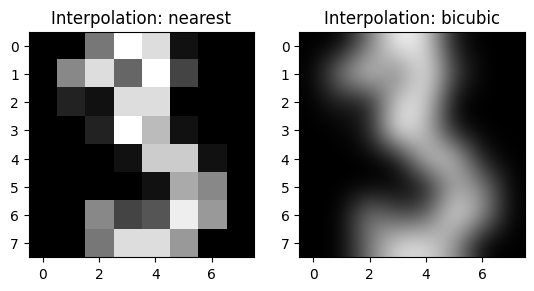

In [192]:
digit_3_index = np.where(target == 3)[0][0]
digit_3_image = images[digit_3_index]

plt.figure()
plt.gray()
plt.subplot(1, 2, 1)
plt.imshow(digit_3_image, interpolation="nearest")
plt.title("Interpolation: nearest")
plt.subplot(1, 2, 2)
plt.imshow(digit_3_image, interpolation="bicubic")
plt.title("Interpolation: bicubic")
plt.show()

In [193]:
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

# Filter the dataset to only include digits 3 and 9
X = digits.data[(digits.target == 3) | (digits.target == 9)]
y = digits.target[(digits.target == 3) | (digits.target == 9)]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

ex2

2.1

In [194]:
def features2d(x):
    f1 = 0.3*x[:, 22] + 4.2*x[:, 12] - x[:, 63]
    f2 = x[:, 32] - x[:, 61]
    return np.stack((f1, f2), axis=1)


2.2

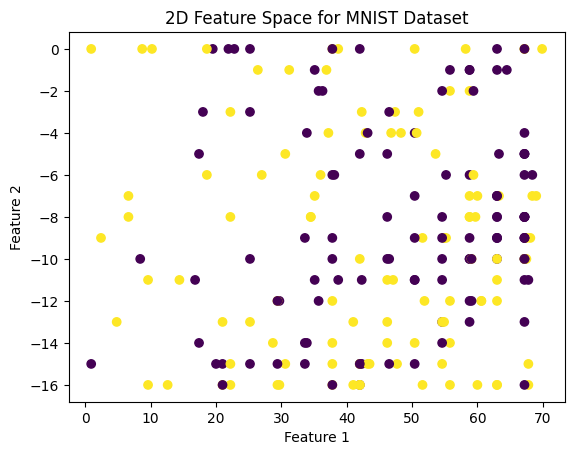

In [195]:
# Compute 2D features for training images
train_features = features2d(X_train)

# Plot 2D features in scatter plot
plt.scatter(train_features[:, 0], train_features[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Feature Space for MNIST Dataset')
plt.show()

2.3

In [196]:
def nearest_mean(training_features, training_labels, test_features):
    # Compute mean feature vectors for each class
    class_3_mean = np.mean(training_features[training_labels == 3], axis=0)
    class_9_mean = np.mean(training_features[training_labels == 9], axis=0)

    # Assign each test instance to the label of the nearest mean
    predicted_labels = []
    for feature in test_features:
        dist_3 = np.linalg.norm(feature - class_3_mean)
        dist_9 = np.linalg.norm(feature - class_9_mean)
        if dist_3 < dist_9:
            predicted_labels.append(3)
        else:
            predicted_labels.append(9)

    return np.array(predicted_labels)


In [197]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute 2D features for training and test sets
train_features = features2d(X_train)
test_features = features2d(X_test)

# Compute predicted labels for training set
train_predicted_labels = nearest_mean(train_features, y_train, train_features)
train_error = np.mean(train_predicted_labels != y_train)
print(f"Training error: {train_error:.4f}")

# Compute predicted labels for test set
test_predicted_labels = nearest_mean(train_features, y_train, test_features)
test_error = np.mean(test_predicted_labels != y_test)
print(f"Test error: {test_error:.4f}")


Training error: 0.4470
Test error: 0.4863


2.4

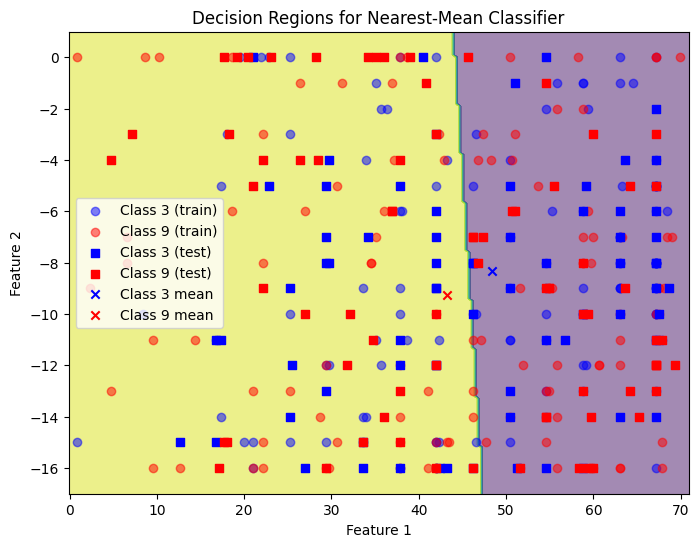

In [198]:
# Compute mean feature vectors for each class
class_3_mean = np.mean(train_features[y_train == 3], axis=0)
class_9_mean = np.mean(train_features[y_train == 9], axis=0)

# Define a grid of pixels in the feature space
x_min, x_max = train_features[:, 0].min() - 1, train_features[:, 0].max() + 1
y_min, y_max = train_features[:, 1].min() - 1, train_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Compute predicted labels for grid
grid_features = np.c_[xx.ravel(), yy.ravel()]
grid_predicted_labels = nearest_mean(train_features, y_train, grid_features)
grid_predicted_labels = grid_predicted_labels.reshape(xx.shape)

# Plot decision regions, means, and test data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predicted_labels, cmap='viridis', alpha=0.5)
plt.scatter(train_features[y_train == 3, 0], train_features[y_train == 3, 1], label='Class 3 (train)', c='b', alpha=0.5)
plt.scatter(train_features[y_train == 9, 0], train_features[y_train == 9, 1], label='Class 9 (train)', c='r', alpha=0.5)
plt.scatter(test_features[y_test == 3, 0], test_features[y_test == 3, 1], label='Class 3 (test)', c='b', marker='s')
plt.scatter(test_features[y_test == 9, 0], test_features[y_test == 9, 1], label='Class 9 (test)', c='r', marker='s')
plt.scatter([class_3_mean[0]], [class_3_mean[1]], label='Class 3 mean', c='b', marker='x')
plt.scatter([class_9_mean[0]], [class_9_mean[1]], label='Class 9 mean', c='r', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for Nearest-Mean Classifier')
plt.legend()
plt.show()


In [199]:
import scipy.io as sio

# Save training data to file
sio.savemat('my_data.mat', {'X_train': X_train, 'y_train': y_train})
sio.savemat('my_test_data.mat', {'X_test': X_test, 'y_test': y_test})


ex3

In [210]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


def fit_lda(X, y, reg=1e-6):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    n_classes = len(classes)

    # Check if any classes have zero samples
    empty_classes = []
    for c in classes:
        if np.sum(y == c) == 0:
            empty_classes.append(c)
    
    # Remove empty classes from the dataset
    X = np.delete(X, np.where(np.isin(y, empty_classes)), axis=0)
    y = np.delete(y, np.where(np.isin(y, empty_classes)))

    mu = np.zeros((n_features, n_classes))
    covmat = np.zeros((n_features, n_features))
    p = np.zeros(n_classes)

    for i, c in enumerate(classes):
        Xc = X[y == c, :]
        n_samples_c = Xc.shape[0]
        mu[:, i] = np.mean(Xc, axis=0)
        covmat += (1 / n_samples_c) * np.dot((Xc - mu[:, i]).T, (Xc - mu[:, i]))
        p[i] = n_samples_c / X.shape[0]

    covmat += reg * np.identity(n_features)
   
    return mu, covmat, p
    


In [211]:
import scipy.io as sio

# Load training data from file
data = sio.loadmat('my_data.mat')
X_train = data['X_train']
y_train = data['y_train']

# Fit LDA model
mu, covmat, p = fit_lda(X_train, y_train)

# Print the results
print('mu:', mu)
print('covmat:', covmat)
print('p:', p)

mu: [[0.00000000e+00 0.00000000e+00]
 [6.66666667e-01 1.22641509e-01]
 [8.39639640e+00 5.86792453e+00]
 [1.41531532e+01 1.21886792e+01]
 [1.39009009e+01 1.16037736e+01]
 [7.10810811e+00 5.70754717e+00]
 [8.10810811e-01 1.38679245e+00]
 [9.00900901e-03 2.83018868e-02]
 [0.00000000e+00 0.00000000e+00]
 [3.76576577e+00 2.59433962e+00]
 [1.22162162e+01 1.29528302e+01]
 [9.07207207e+00 9.50000000e+00]
 [1.14504505e+01 1.00943396e+01]
 [1.15675676e+01 1.15943396e+01]
 [2.10810811e+00 2.31132075e+00]
 [9.00900901e-03 7.54716981e-02]
 [0.00000000e+00 0.00000000e+00]
 [1.60360360e+00 3.60377358e+00]
 [3.50450450e+00 1.23867925e+01]
 [3.45045045e+00 5.91509434e+00]
 [1.17027027e+01 8.48113208e+00]
 [9.00000000e+00 1.43962264e+01]
 [9.00900901e-01 3.06603774e+00]
 [0.00000000e+00 5.66037736e-02]
 [0.00000000e+00 0.00000000e+00]
 [1.44144144e-01 1.87735849e+00]
 [1.45045045e+00 9.99056604e+00]
 [8.70270270e+00 1.19150943e+01]
 [1.39009009e+01 1.31037736e+01]
 [5.58558559e+00 1.39528302e+01]
 [6.30

3.2

In [202]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split



def predict_lda(mu, covmat, p, test_features):
    n_test = test_features.shape[0]
    predicted_labels = np.zeros(n_test, dtype=np.int8)

    for i in range(n_test):
        x = test_features[i, :]
        g_3 = -0.5 * (x.reshape(-1, 1) - mu[:, 0].reshape(-1, 1)).T @ np.linalg.inv(covmat) @ (x.reshape(-1, 1) - mu[:, 0].reshape(-1, 1)) + np.log(p[0])
        g_9 = -0.5 * (x.reshape(-1, 1) - mu[:, 1].reshape(-1, 1)).T @ np.linalg.inv(covmat) @ (x.reshape(-1, 1) - mu[:, 1].reshape(-1, 1)) + np.log(p[1])
        predicted_labels[i] = 3 if g_3 > g_9 else 9

    return predicted_labels



# Load training data from file
train_data = sio.loadmat('my_data.mat')
X_train, y_train = train_data['X_train'], train_data['y_train'].ravel()

# Load test data from file
test_data = sio.loadmat('my_test_data.mat')
X_test, y_test = test_data['X_test'], test_data['y_test'].ravel()

# Fit LDA model
mu, covmat, p = fit_lda(X_train, y_train)

# Make predictions on test set
test_pred = predict_lda(mu, covmat, [p_3, p_9], X_test)
print(test_pred)


[9 9 9 3 3 9 3 9 9 9 3 3 9 3 9 3 3 9 9 9 3 9 3 3 3 3 3 9 9 3 9 9 9 3 9 9 9
 3 9 3 3 9 3 3 3 3 3 3 3 3 3 9 9 9 9 9 9 3 3 9 9 9 3 3 9 9 3 9 3 9 3 3 3 3
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 3 9 3 9 9 9 9 3 9 3 3 3 3 9 9 3 3 3 9 3
 9 9 9 3 3 3 9 9 9 9 9 3 3 9 3 3 9 3 9 9 9 9 9 9 9 9 9 3 3 9 3 3 3 9 9]


3.3

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.linalg

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib as mpl

In [206]:
def plot_lda_decision_regions(X, y, mu, covmat, p):
    n_classes = len(p)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    xy = np.column_stack([xx.ravel(), yy.ravel()])

    d = np.zeros((xy.shape[0], n_classes))
    for i in range(n_classes):
        # Calculate the Mahalanobis distance between each point in the grid and the class mean
        diff = xy - mu[:, i]
        diff = diff[:, np.newaxis, :]
        d[:, i] = -0.5 * np.sum(np.dot(diff, np.dot(np.linalg.inv(covmat), diff.transpose(0, 2, 1))), axis=-1) - 0.5 * np.log(np.linalg.det(covmat)) + np.log(p[i])

    # Predict the class for each point in the grid
    y_pred = np.argmax(d, axis=1)

    # Reshape predictions back into a grid
    y_pred_grid = y_pred.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, y_pred_grid, alpha=0.2)

    # Plot the data points
    for i, color in zip(range(n_classes), 'bgr'):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=0.5)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('LDA Decision Regions')
    plt.show()

In [207]:
mu, covmat, p = fit_lda(X_train, y_train)
test_pred = predict_lda(mu, covmat, p, X_test)
plot_lda_decision_regions(X_train, y_train, mu, covmat, p)
plot_lda_decision_regions(X_test, test_pred, mu, covmat, p)

ValueError: operands could not be broadcast together with shapes (250000,2) (64,) 

3.4

In [212]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# select only digits 3 and 9
X = np.concatenate((digits.data[digits.target==3], digits.data[digits.target==9]))
y = np.concatenate((digits.target[digits.target==3], digits.target[digits.target==9]))

# create an instance of LDA classifier
lda = LinearDiscriminantAnalysis()

# perform 10-fold cross validation
scores = cross_val_score(lda, X, y, cv=10)

# print the average and standard deviation of the test scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.98 (+/- 0.05)
